In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.5266363256335851, pvalue=0.4683553871992374)
Test: f_t, p_value_t -1.433E+00 1.526E-01
ANOVA: f, p_value: 2.052E+00 1.526E-01
--------------------------------------------------------------------------------


Group1:  [79 58 76 59 77 86 60 74 76 71 50 80 61 64 61 29 72 72 60 89 68 83 61 75
 66 85 65 63 91 72 71 70 59 76 57 71 71 47 78 67 65 75 57 64 61 88 65 75
 69 58 85 57 82 73 70 59 70 74 56 59 63 82 73 72 58 54 56 70 77 59 68 88
 69 86 80 59 71 67 47 57 74 60 66 74 93 67 66 75 75 78 71 79 80 59 79 63
 60 77 62 57 53 80 65 48 28 73 63 75 66 65 67 67 64 68 76 66 78 72 62 69
 56 73 77 87 70 92 61 86 68 73 60 70 86 59 78 28 82 68 87 56 68 66 55 63
 79 78 56 69 90 75 57 79 55 68 58 75 66 78 59 68 74 76 60 68 82 60 80 67
 66 54 75 65 49 56 74 53 69 76 69 76 70 79 73 64 73 76 52 83 64 78 80 68
 66 68 77 76 57 71 68 65 68 62 74 65 68 69 79 78 79 54 81 57 6

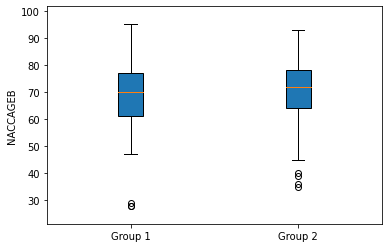

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=20.87902394731879, pvalue=6.135510545980999e-06)
Test: f_t, p_value_t 4.565E+00 6.304E-06
ANOVA: f, p_value: 2.088E+01 6.304E-06
--------------------------------------------------------------------------------


Group1:  [8 8 8 8 8 1 8 1 1 8 8 8 1 8 1 1 8 8 8 8 8 1 8 8 8 8 8 8 1 1 1 8 8 8 8 8 8
 8 8 8 1 8 8 8 8 1 8 1 8 8 8 8 8 1 1 8 8 1 8 8 8 8 8 1 8 8 8 1 8 8 1 8 8 8
 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 1 8 8 1 1 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 1 1 8 1 8 8 8 8 8 8 8 8 1 1 8 1 8 8 8 1 8 1 8 8 8 1 8 8 8 8 8 8
 1 8 8 8 8 1 8 1 8 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 1 8 1 1 8 8 1 8 1 8 8
 1 1 8 8 1 8 1 8 8 8 1 8 8 8 8 8 8 8 8 8 1 8 8 1 8 8 8 8 8 8 8 1 8 8 8 8 8
 8 1 8 8 8 8 8 8 8 8 8 8 1 8 8 1 1 8 8 1 8 8 8 8 8 1 8 8 8 1 8 1 8 8 

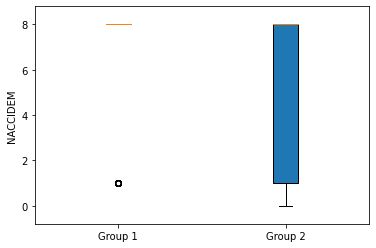

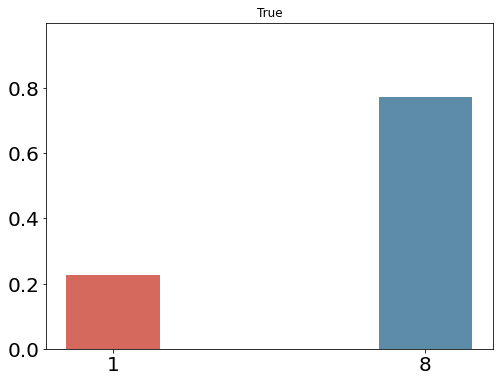

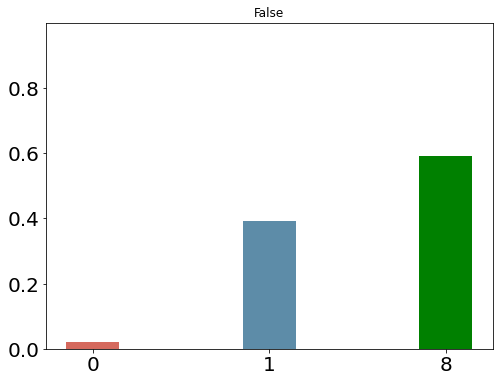

************************************************************************************************************************





Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.0019151159671715139, pvalue=0.9651111156023993)
Test: f_t, p_value_t -1.213E+00 2.257E-01
ANOVA: f, p_value: 1.471E+00 2.257E-01
--------------------------------------------------------------------------------


Group1:  [84 59 81 60 80 93 61 81 80 74 51 83 65 70 73 34 73 76 61 93 70 88 63 76
 68 89 70 66 97 83 81 75 63 81 59 76 76 51 81 69 67 78 59 68 64 93 72 83
 71 66 88 58 86 82 80 61 77 79 60 61 69 86 74 76 63 56 57 78 80 61 71 90
 75 87 83 66 73 68 51 59 76 62 71 78 94 69 76 81 80 82 74 80 87 64 83 64
 61 79 66 60 54 84 69 49 35 78 64 81 68 66 69 68 66 70 84 70 88 78 67 79
 60 76 81 91 76 95 65 89 75 85 65 74 87 62 79 38 85 71 89 57 72 74 56 65
 81 83 59 70 100 79 60 80 61 79 59 80 67 80 61 72 75 77 61 69 89 62 82 70
 70 57

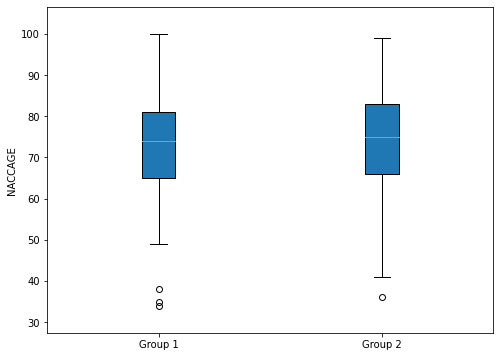

************************************************************************************************************************





Feature:  NACCDAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.3966957707488091, pvalue=0.5290810670872743)
Test: f_t, p_value_t -7.180E-01 4.731E-01
ANOVA: f, p_value: 5.156E-01 4.731E-01
--------------------------------------------------------------------------------


Group1:  [89 61 81 69 85 95 65 83 84 80 59 85 65 72 73 41 76 78 71 94 73 92 72 79
 73 94 75 74 98 87 83 77 64 85 61 83 78 55 84 72 70 84 63 75 70 94 72 87
 76 68 92 63 88 85 82 65 78 83 62 66 72 88 77 78 64 61 62 78 84 64 73 95
 79 91 89 67 76 72 54 64 78 67 72 82 97 71 78 85 81 86 79 85 89 65 85 66
 63 80 70 64 61 85 70 50 35 82 67 84 74 68 74 70 70 75 84 72 91 82 74 81
 65 77 85 96 82 101 67 92 82 86 69 74 88 65 81 39 87 77 90 59 76 77 62 67
 82 89 62 74 102 86 66 91 62 82 61 81 72 85 68 75 76 78 62 70 91 64 91 76
 76 61 

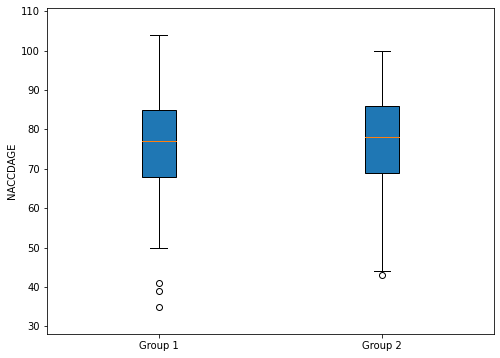

************************************************************************************************************************





Feature:  COGJUDG


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=7.25284828634928, pvalue=0.007310504398161324)
Test: f_t, p_value_t 2.677E+00 7.900E-03
ANOVA: f, p_value: 7.253E+00 7.900E-03
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

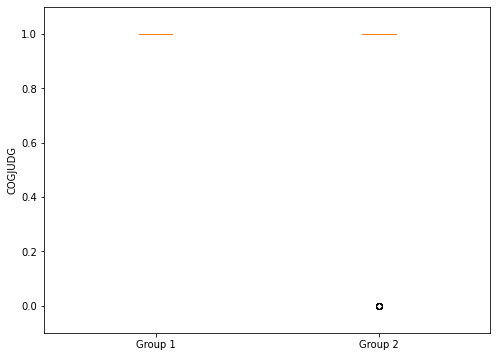

************************************************************************************************************************





Feature:  COGMODE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.412790371484904, pvalue=0.23514366053331648)
Test: f_t, p_value_t -1.189E+00 2.351E-01
ANOVA: f, p_value: 1.413E+00 2.351E-01
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

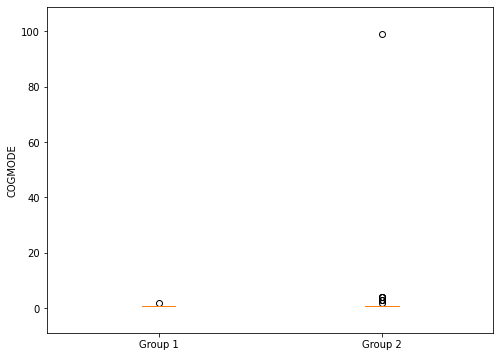

************************************************************************************************************************





Feature:  NACCCOGF


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.610746808791174, pvalue=0.03224014696036183)
Test: f_t, p_value_t 2.152E+00 3.193E-02
ANOVA: f, p_value: 4.611E+00 3.193E-02
--------------------------------------------------------------------------------


Group1:  [1 1 99 1 1 99 4 1 1 1 1 1 1 1 99 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 5
 1 4 1 1 1 3 1 99 1 4 1 3 1 1 1 1 1 1 1 1 1 99 1 1 1 1 99 3 1 5 1 1 1 1 99
 3 1 1 1 1 1 1 1 99 4 1 3 1 1 1 99 1 1 99 4 1 1 1 99 1 1 5 4 99 99 3 1 5 4
 3 1 5 1 1 1 1 3 3 1 1 99 1 1 1 1 1 6 1 1 1 1 1 3 1 1 3 4 1 99 4 6 1 5 1 1
 4 1 5 4 99 1 1 1 99 1 1 1 1 99 1 4 3 1 4 1 1 3 3 4 1 1 1 1 1 3 1 2 1 4 1
 1 1 1 1 1 1 8 99 6 4 1 1 1 3 1 1 1 1 3 3 1 5 99 3 99 3 5 3 5 4 1 1 4 1 1
 1 4 6 1 1 1 3 4 1 1 1 1 1 1 1 1 3 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 5 5 1

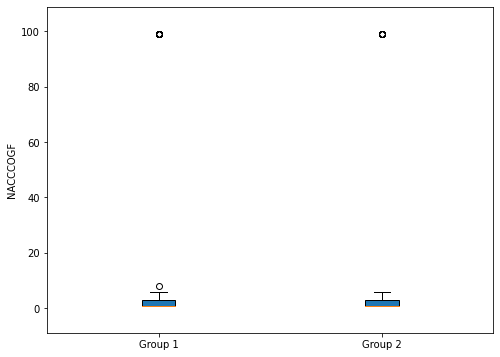

************************************************************************************************************************





Feature:  JUDGMENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=32.68735793085496, pvalue=1.8390445895003226e-08)
Test: f_t, p_value_t 1.510E+01 3.616E-42
ANOVA: f, p_value: 2.270E+02 3.616E-42
--------------------------------------------------------------------------------


Group1:  [3.0 2.0 1.0 2.0 1.0 2.0 3.0 2.0 2.0 2.0 2.0 1.0 2.0 3.0 3.0 1.0 2.0 2.0
 3.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 1.0 1.0 3.0 2.0 2.0 3.0 2.0 3.0 2.0 3.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0
 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 1.0
 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0
 2.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0
 2.0 3.0 1.0 2.0 2.0 2.0 1.0 1.0 3.0 2.0 1.0 2.0 2.0 3.0 2.0 2.0 2.0 1.0
 1.0 2.

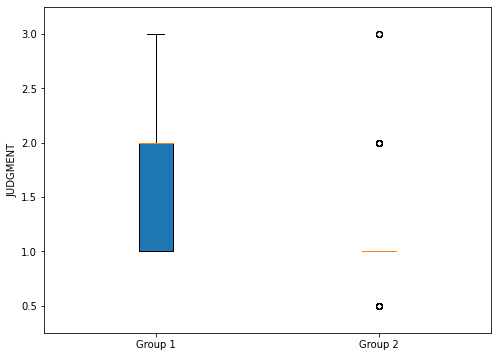

************************************************************************************************************************





Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.313043275442425, pvalue=0.00410136322062183)
Test: f_t, p_value_t 1.879E+01 9.897E-60
ANOVA: f, p_value: 3.541E+02 9.897E-60
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0
 2.0 2.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0

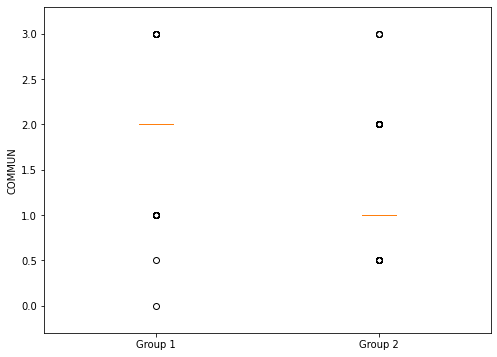

************************************************************************************************************************





Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=7.300413608793739, pvalue=0.007122148227903129)
Test: f_t, p_value_t 1.843E+01 5.547E-58
ANOVA: f, p_value: 3.404E+02 5.547E-58
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 3.0 1.0 2.0
 2.0 3.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 1.0 3.0 3.0 3.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 2.0
 3.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 3.0 2.0 2.0 2.0
 2.0 3.0 

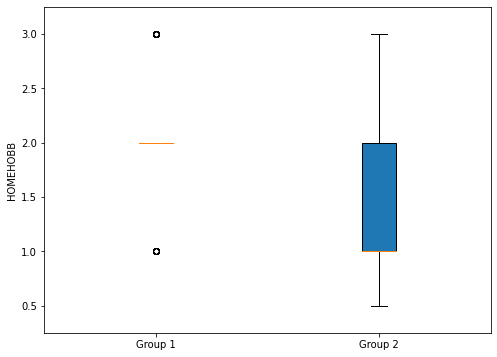

************************************************************************************************************************







In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    if feature_name=='NACCIDEM':
        draw_bar(group1_data,'True')
        draw_bar(group2_data,'False')
            
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()